# Exploring the frontiers between rankings

In [1]:
%matplotlib tk

import matplotlib.pyplot as plt

from sorbetto.annotation import AnnotationFrontiersBetweenRankings
from sorbetto.core import Entity
from sorbetto.parameterization import ParameterizationDefault
from sorbetto.performance import FiniteSetOfTwoClassClassificationPerformances
from sorbetto.performance.distribution import (
    UniformDistributionOfTwoClassClassificationPerformances,
)
from sorbetto.ranking import RankingInducedByScore, RankingScore
from sorbetto.tile import Tile

In [2]:
# We create a random distribution to draw performances from
distri = UniformDistributionOfTwoClassClassificationPerformances(
    "the uniform distribution"
)

ca = Entity(distri.drawOneAtRandom(), 'Classifier "A"', "mediumvioletred")
cb = Entity(distri.drawOneAtRandom(), 'Classifier "B"', "mediumslateblue")
cc = Entity(distri.drawOneAtRandom(), 'Classifier "C"', "mediumseagreen")
cd = Entity(distri.drawOneAtRandom(), 'Classifier "D"', "sandybrown")
ce = Entity(distri.drawOneAtRandom(), 'Classifier "E"', "lightcoral")

# We create a set of entities with random performances
entities = [ca, cb, cc, cd, ce]

In [3]:
# We will use the default parameterization for drawing the Tile
parameterization = ParameterizationDefault()


# Drawing the Tile with ranking frontiers
def draw_tile(fig, ax):
    tile = Tile(parameterization=parameterization)
    performances = FiniteSetOfTwoClassClassificationPerformances(
        [e.performance for e in entities]
    )
    annotation = AnnotationFrontiersBetweenRankings(performances)
    tile.appendAnnotation(annotation)
    tile.draw(fig, ax)


# Drawing the ranking ladder induced by a specific score
def draw_ranking(fig, ax, coords):
    importance = parameterization.getCanonicalImportance(*coords)
    score = RankingScore(importance, name="Ranking Score")
    ranking = RankingInducedByScore(entities, score)
    ranking.draw(fig, ax)

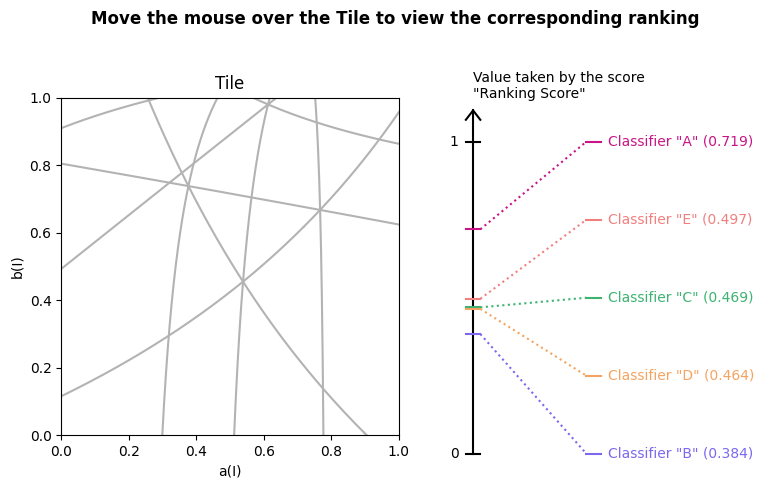

In [4]:
# We create the fiture with two subplots: one for the Tile and one for the ranking
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
draw_tile(fig, ax[0])
draw_ranking(fig, ax[1], (0.5, 0.5))
fig.suptitle(
    "Move the mouse over the Tile to view the corresponding ranking", fontweight="bold"
)
plt.tight_layout()


# Update the selected score when moving the mouse
def update(event):
    if event.inaxes != ax[0]:
        return

    ax[1].clear()
    draw_ranking(fig, ax[1], (event.xdata, event.ydata))
    plt.show()


plt.connect("motion_notify_event", update)
plt.show()
fig